In [1]:
import pandas as pd
import numpy as np

import json

from scripts.utils import SimulateData

from IPython.display import Image
import matplotlib.pyplot as plt
import seaborn as sns

# SSRT by SSD

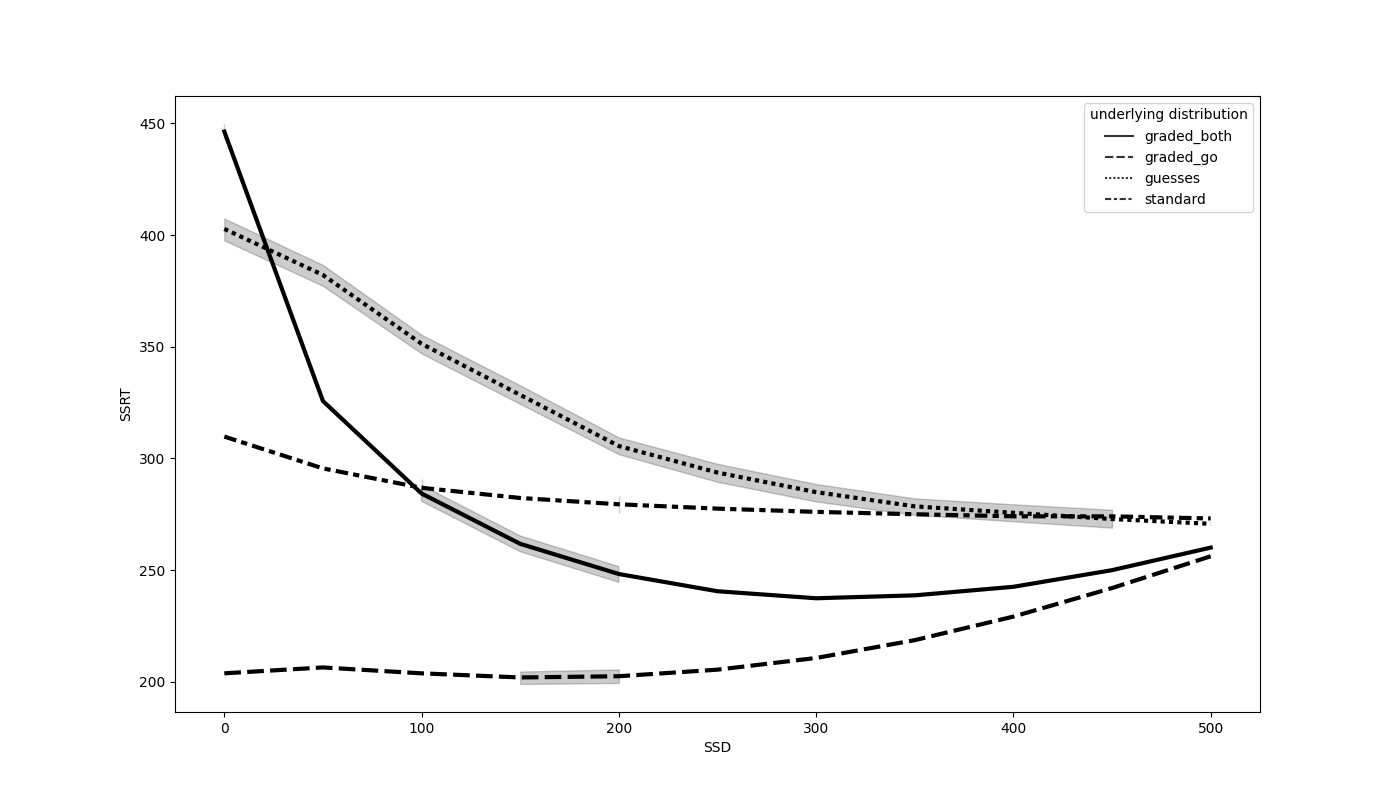

In [2]:
Image('figures/SSRT_by_SSD.png')

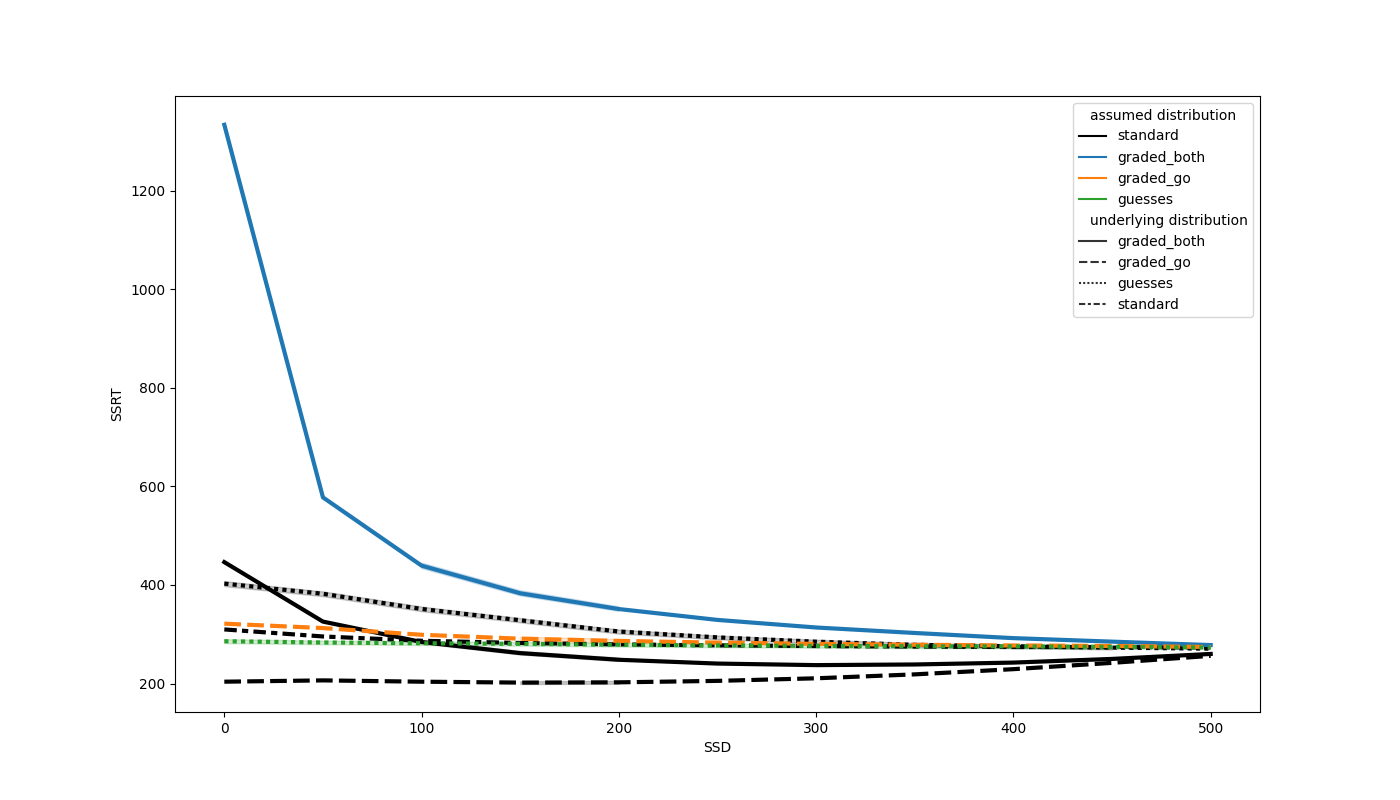

In [3]:
Image('figures/SSRT_by_SSD_supplement.png')

# Inhibition Function

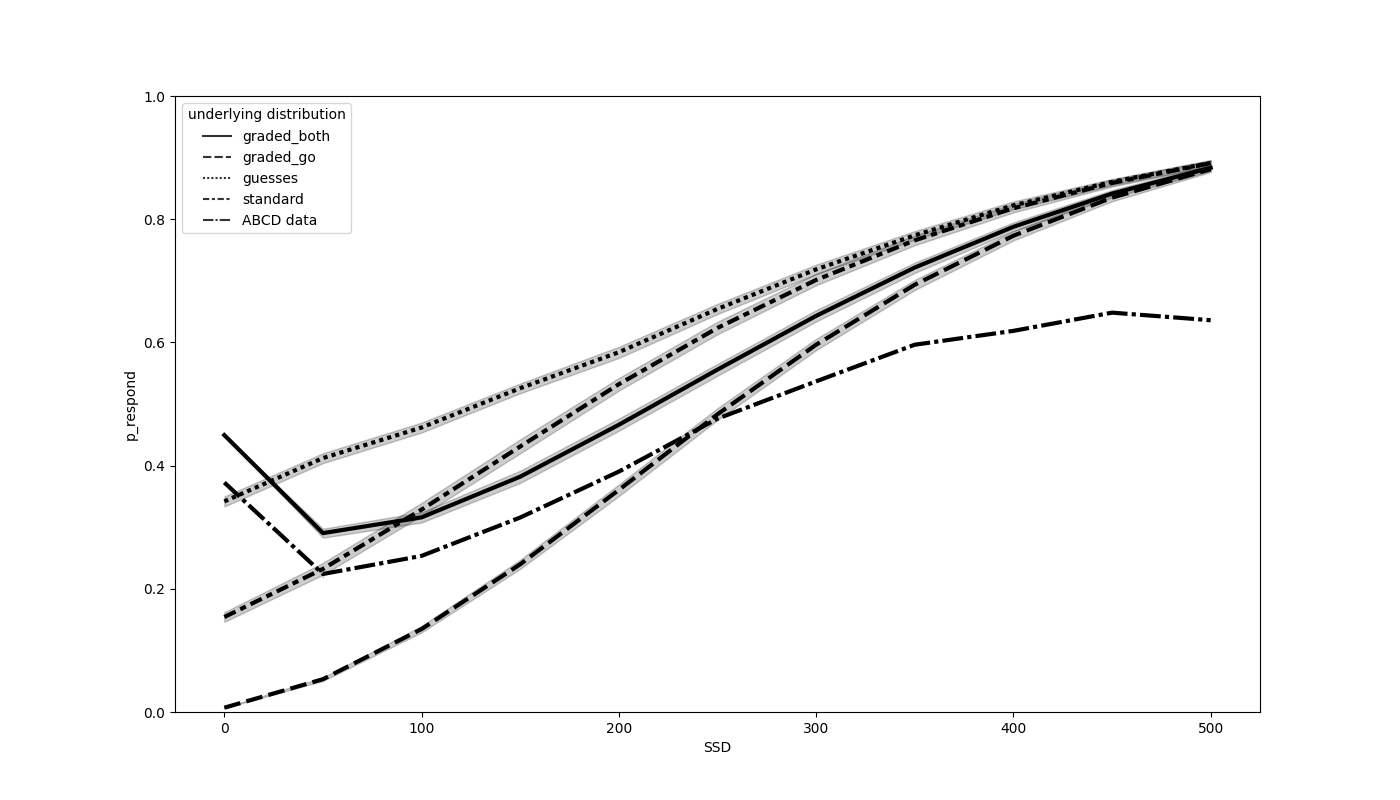

In [4]:
Image('figures/inhibition_function.png')

# Individual Differences

In [5]:
def add_identity(axes, *line_args, **line_kwargs):
    identity, = axes.plot([], [], *line_args, **line_kwargs)
    def callback(axes):
        low_x, high_x = axes.get_xlim()
        low_y, high_y = axes.get_ylim()
        low = max(low_x, low_y)
        high = min(high_x, high_y)
        identity.set_data([low, high], [low, high])
    callback(axes)
    axes.callbacks.connect('xlim_changed', callback)
    axes.callbacks.connect('ylim_changed', callback)
    return axes

In [6]:
df = pd.read_csv('ssrt_metrics/expected_ssrts.csv', index_col=0)

# reformatting - was multiindex
df.columns = [ f'gen-{gen}_SSRT-{ssrt}' for gen, ssrt in zip(df.loc['underlying distribution', :].values, df.columns)]
df = df.drop(['underlying distribution', 'NARGUID'])

for col in df.columns:
    df[col] = df[col].astype(float)


In [7]:
sim_rt_info = pd.read_csv('simulated_data/sim_rt_meanStd.csv', index_col = 0)

In [8]:
# getting expect SSRTs
mus_path = 'abcd_data/assigned_mus.json'
with open(mus_path, 'r') as f:
    mus_dict = json.load(f)
    
mus_df = pd.DataFrame(mus_dict).T

In [9]:
monster_df = pd.concat([mus_df.add_prefix('expected_'), sim_rt_info, df], 1, sort=True)

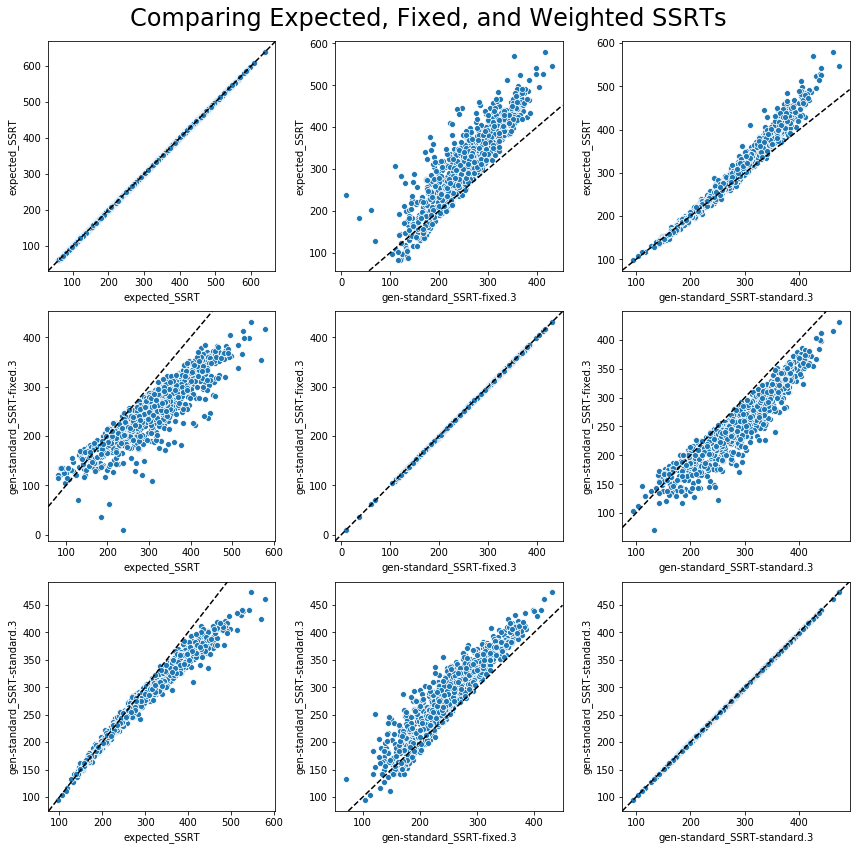

In [10]:
fig, axes = plt.subplots(3, 3, figsize=(12,12))

columns = ['expected_SSRT', 'gen-standard_SSRT-fixed.3', 'gen-standard_SSRT-standard.3']
for idx,coli in enumerate(columns):
    for jdx, colj in enumerate(columns):
        ax = sns.scatterplot(x=colj, y=coli, data=monster_df, ax=axes[idx, jdx])
        _ = add_identity(ax, color='k', ls='--')
_ = fig.suptitle('Comparing Expected, Fixed, and Weighted SSRTs', fontsize=24)
fig.tight_layout()
fig.subplots_adjust(top=0.94)

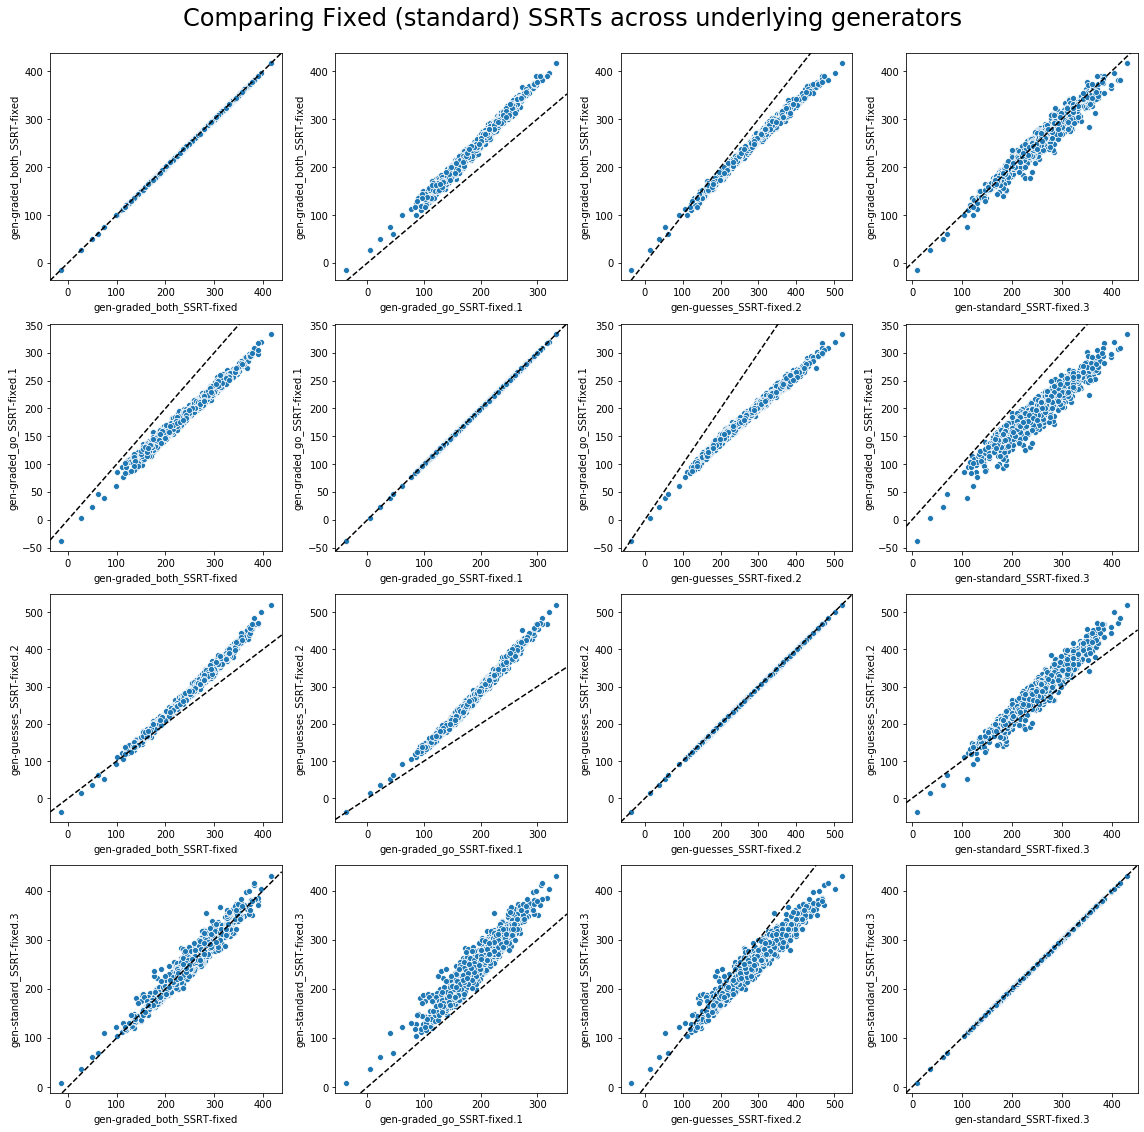

In [25]:
curr_df = monster_df.filter(regex='fixed')

fig, axes = plt.subplots(4, 4, figsize=(16,16))

for idx,coli in enumerate(curr_df.columns):
    for jdx, colj in enumerate(curr_df.columns):
        ax = sns.scatterplot(x=colj, y=coli, data=monster_df, ax=axes[idx, jdx])
        _ = add_identity(ax, color='k', ls='--')
_ = fig.suptitle('Comparing Fixed (standard) SSRTs across underlying generators', fontsize=24)
fig.tight_layout()
fig.subplots_adjust(top=0.94)

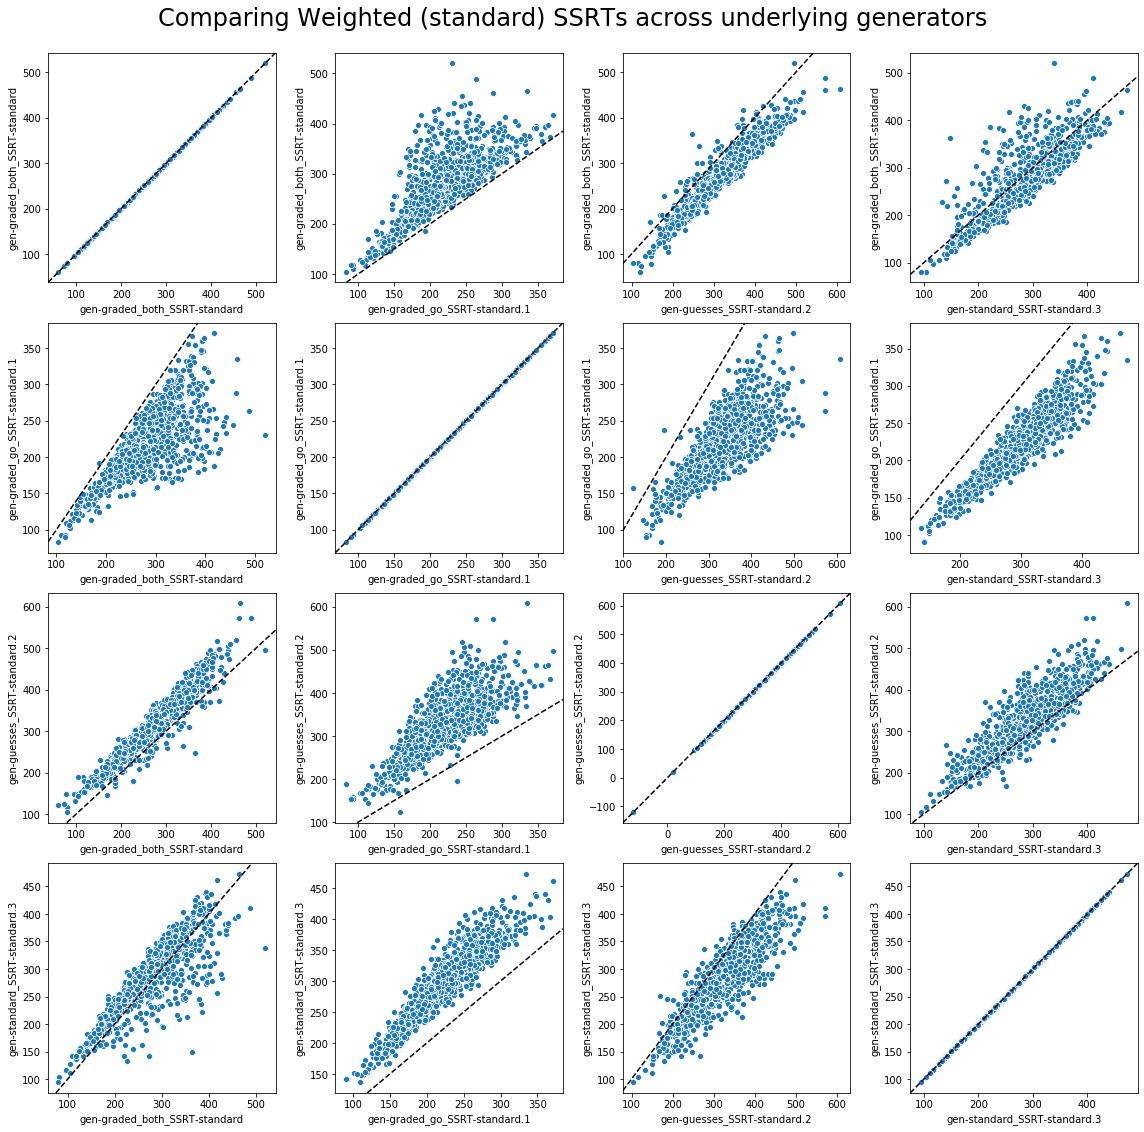

In [12]:
curr_df = monster_df.filter(regex='SSRT-standard')

fig, axes = plt.subplots(4, 4, figsize=(16,16))

for idx,coli in enumerate(curr_df.columns):
    for jdx, colj in enumerate(curr_df.columns):
        ax = sns.scatterplot(x=colj, y=coli, data=monster_df, ax=axes[idx, jdx])
        _ = add_identity(ax, color='k', ls='--')
_ = fig.suptitle('Comparing Weighted (standard) SSRTs across underlying generators', fontsize=24)
fig.tight_layout()
fig.subplots_adjust(top=0.94)

In [13]:
df.filter(regex='SSRT-standard').corr(method='spearman')

,gen-graded_both_SSRT-standard,gen-graded_go_SSRT-standard.1,gen-guesses_SSRT-standard.2,gen-standard_SSRT-standard.3
gen-graded_both_SSRT-standard,1.000000,0.758875,0.956348,0.852844
gen-graded_go_SSRT-standard.1,0.758875,1.000000,0.791433,0.934007
gen-guesses_SSRT-standard.2,0.956348,0.791433,1.000000,0.878498
gen-standard_SSRT-standard.3,0.852844,0.934007,0.878498,1.000000


In [14]:
df

,gen-graded_both_SSRT-standard,gen-graded_go_SSRT-standard.1,gen-guesses_SSRT-standard.2,gen-standard_SSRT-standard.3,gen-graded_both_SSRT-guesses,gen-graded_go_SSRT-guesses.1,gen-guesses_SSRT-guesses.2,gen-standard_SSRT-guesses.3,gen-graded_both_SSRT-graded_go,gen-graded_go_SSRT-graded_go.1,gen-guesses_SSRT-graded_go.2,gen-standard_SSRT-graded_go.3,gen-graded_both_SSRT-graded_both,gen-graded_go_SSRT-graded_both.1,gen-guesses_SSRT-graded_both.2,gen-standard_SSRT-graded_both.3,gen-graded_both_SSRT-fixed,gen-graded_go_SSRT-fixed.1,gen-guesses_SSRT-fixed.2,gen-standard_SSRT-fixed.3
00J52GPG,366.900000,186.433333,369.233333,275.250000,252.421342,51.636237,262.479733,163.327881,816.516667,266.300000,758.516667,466.350000,816.516667,266.300000,758.516667,466.350000,253.0,196.0,283.0,237.0
00LJVZK2,317.905660,233.924528,367.056604,310.924528,263.940352,165.002737,310.794350,255.311338,596.679245,323.471698,637.490566,492.981132,596.679245,323.471698,637.490566,492.981132,271.0,215.0,321.0,272.0
00R4TXET,252.216667,195.200000,296.400000,266.250000,211.472205,149.845375,257.603902,224.075711,381.433333,265.733333,438.383333,367.283333,381.433333,265.733333,438.383333,367.283333,249.0,197.0,280.0,246.0
028WCTG6,274.950000,211.816667,342.266667,289.350000,219.873738,152.713332,288.924857,234.838541,387.966667,290.400000,486.616667,408.650000,387.966667,290.400000,486.616667,408.650000,273.0,210.0,317.0,263.0
029PWCFY,316.916667,231.983333,368.000000,327.000000,261.166751,167.517691,315.341094,270.050079,533.516667,329.333333,617.883333,503.200000,533.516667,329.333333,617.883333,503.200000,283.0,225.0,327.0,290.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZUXHPX3N,225.300000,193.950000,259.400000,254.450000,212.707641,181.176646,249.969665,246.224938,296.566667,258.283333,354.183333,339.400000,296.566667,258.283333,354.183333,339.400000,230.0,176.0,253.0,223.0
ZWWDT1TG,276.767857,252.678571,338.964286,304.428571,242.888721,218.240957,305.150443,272.020149,351.267857,313.196429,430.803571,383.571429,351.267857,313.196429,430.803571,383.571429,304.0,244.0,366.0,296.0
ZXF5C635,295.550000,257.166667,342.400000,342.533333,287.767214,247.413711,336.421016,337.669554,401.750000,350.666667,471.800000,460.816667,401.750000,350.666667,471.800000,460.816667,280.0,214.0,317.0,293.0
ZXPAWB32,251.206897,228.879310,273.689655,286.396552,246.612359,223.705912,270.574834,283.827965,316.655172,291.568966,356.500000,362.724138,316.655172,291.568966,356.500000,362.724138,243.0,183.0,265.0,242.0


# Investigating those missing SSRTs

In [15]:
mount_path = '/Users/henrymj/Documents/mounts/OAK/users/henrymj/ABCD_simulations/ssrt_metrics/individual_metrics'
sub = '00J52GPG'
eg_df = pd.read_csv('%s/standard_%s.csv' % (mount_path, sub))
eg_df

,Unnamed: 0,SSRT,mean_SSD,p_respond,max_RT,mean_go_RT,mean_stopfail_RT,omission_count,omission_rate,go_acc,stopfail_acc,SSD,SSRT_w_guesses,SSRT_w_graded
0,0,283.0,0.0,0.060000,2239.0,532.6336,293.573333,0,0.0,NaN,NaN,0.0,147.506106,542.0
1,1,276.0,50.0,0.133600,2239.0,532.6336,304.401198,0,0.0,NaN,NaN,50.0,158.030667,443.0
2,2,265.0,100.0,0.216400,2239.0,532.6336,325.495379,0,0.0,NaN,NaN,100.0,177.820611,399.0
3,3,268.0,150.0,0.334000,2239.0,532.6336,348.588024,0,0.0,NaN,NaN,150.0,204.000000,377.0
4,4,251.0,200.0,0.415200,2239.0,532.6336,372.983622,0,0.0,NaN,NaN,200.0,216.368763,354.0
5,5,255.0,250.0,0.533600,2239.0,532.6336,388.463268,0,0.0,NaN,NaN,250.0,230.000000,350.0
6,6,253.0,300.0,0.628400,2239.0,532.6336,414.605347,0,0.0,NaN,NaN,300.0,239.000000,331.0
7,7,255.0,350.0,0.707200,2239.0,532.6336,427.564480,0,0.0,NaN,NaN,350.0,247.000000,310.0
8,8,259.0,400.0,0.772800,2239.0,532.6336,447.314700,0,0.0,NaN,NaN,400.0,250.000000,311.0
9,9,255.0,450.0,0.816800,2239.0,532.6336,460.188051,0,0.0,NaN,NaN,450.0,251.000000,287.0


In [16]:
def simulate_graded_RTs_and_sort(n_trials, SSD, sub_params=None):
    sub_params = sub_params if sub_params else {}
    simulator = SimulateData()
    params = simulator._init_params(sub_params)
    params['n_trials_stop'] = 0
    params['n_trials_go'] = n_trials

    params['mu_go'] = simulator._log_grade_mu(params['mu_go_base'], SSD)
    simulator._set_n_trials(params)
    simulator._set_n_guesses(params)  # no guessing is happening

    data_dict = simulator._simulate_go_trials(simulator._init_data_dict(),
                                              params)
    # copy, drop nans, sort
    goRTs = [rt for rt in data_dict['RT'] if rt == rt]
    goRTs.sort()
    return goRTs

In [17]:
mus_dict[sub]

{'goRT': 577.8252548524998,
 'go': 0.1894566413423035,
 'SSRT': 269.61117219227424,
 'stop': 0.4553502401619526}

# Plot graded Mu Go function

In [23]:
SSDs = np.arange(0,650, 5)

simulator = SimulateData()
mu_gos = [[i, simulator._log_grade_mu(1, i)] for i in SSDs]

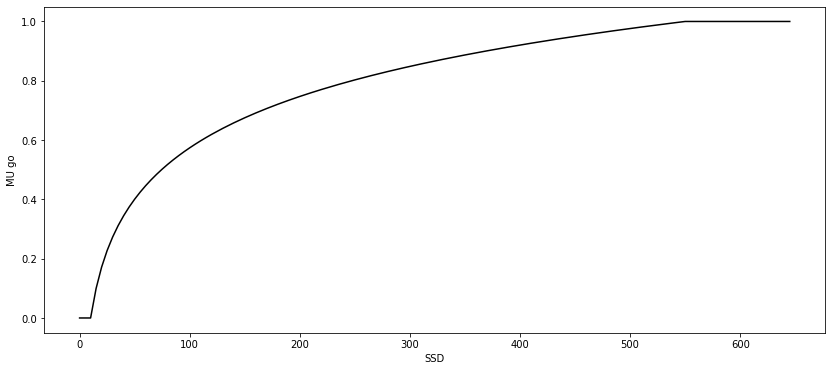

In [24]:
fig,ax = plt.subplots(1,1, figsize=(14, 6))

_ = sns.lineplot(x='SSD', y='MU go', color='k', data=pd.DataFrame(mu_gos, columns=['SSD', 'MU go']))
plt.savefig('figures/graded_mu_go_function.png')